# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [37]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
from IPython.display import Markdown as md
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
d_name = 'mode' 
m_name = 'GB'
train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' , index_col='name')
u_df = pd.read_csv(f'temp_res_comp/unid_prob/{m_name}_{d_name}.csv' , index_col='name')
classes = train_df['true_class'].unique()

### ROC-AUC curve

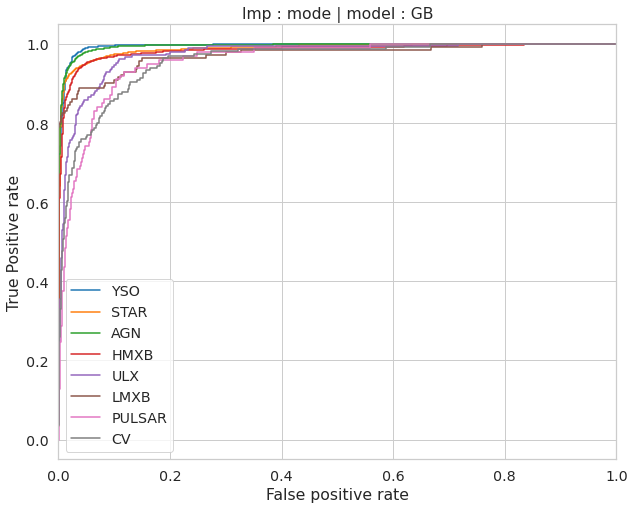

In [30]:
from sklearn.metrics import roc_curve
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,8))
fpr , tpr , th = {} ,{} ,{}
sns.set_palette('tab10')
for cl in classes:
#cl = 'ULX'
    temp_res = train_df.copy()
    temp_res['true_class']  = [1 if el==cl else 0 for el in temp_res['true_class']]
    fpr , tpr , th = roc_curve(temp_res['true_class'] , temp_res[f'prob_{cl}'] , )
    ax.plot(fpr,tpr , label=cl)
    ax.set_xlim(0,1)
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.title(f'Imp : {d_name} | model : {m_name}')
plt.legend()
plt.savefig(f'temp_res_comp/roc-auc/{d_name}_{m_name}.png')
plt.show()

### Confusion Matrix

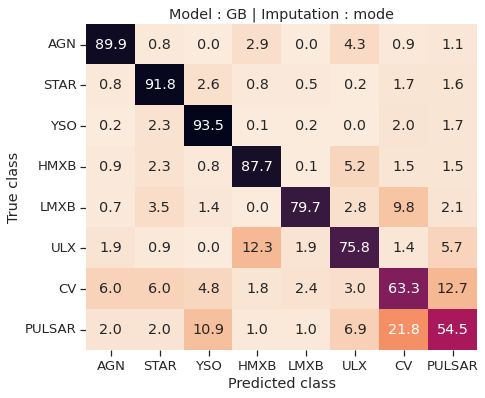

In [33]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([train_df] , plot_dict=plot_dict_def , confidance=0. , ax=ax)
plt.title(f'Model : {m_name} | Imputation : {d_name}')
plt.savefig(f'temp_res_comp/cf/{m_name}_{d_name}.png')
plt.show()

### Scores

In [34]:
from utilities import get_score
score = get_score([train_df])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2642
 AGN           2200
 YSO           1174
 HMXB           780
 ULX            325
 CV             246
 PULSAR         194
 LMXB           142,
 'balanced_accuracy': 0.7950517192867692,
 'accuracy': 0.8926392314682591,
 'precision': 0.9145185038655861,
 'recall': 0.8926392314682591,
 'f1': 0.9010023695318405,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.898539         0.978182  0.936670
 CV          0.632530         0.426829  0.509709
 HMXB        0.877005         0.841026  0.858639
 LMXB        0.797203         0.802817  0.800000
 PULSAR      0.544554         0.283505  0.372881
 STAR        0.917563         0.968963  0.942563
 ULX         0.758294         0.492308  0.597015
 YSO         0.934726         0.914821  0.924666}

### Train Data pred Histogram

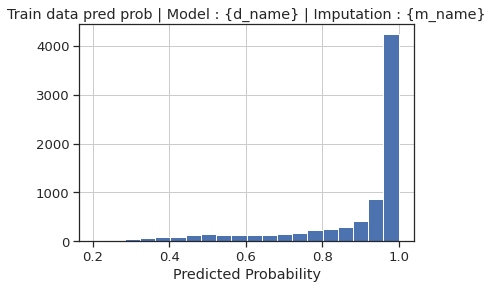

In [35]:
plt.hist(train_df['pred_prob'] , bins=20)
plt.title('Train data pred prob | Model : {d_name} | Imputation : {m_name}')
plt.xlabel('Predicted Probability')
plt.savefig(f'temp_res_comp/train_prob_dist/{d_name}_{m_name}.jpg')
plt.show()

### Unidentified sources

In [53]:
u_df_th = u_df[u_df['prob']>0.9]
md("{}{}".format((u_df['class'].value_counts().to_markdown()) ,  (u_df_th['class'].value_counts().to_markdown()) ))

|        |   class |
|:-------|--------:|
| STAR   |   11845 |
| AGN    |   11679 |
| YSO    |    9063 |
| HMXB   |    4360 |
| ULX    |    1324 |
| CV     |     819 |
| PULSAR |     604 |
| LMXB   |     199 ||        |   class |
|:-------|--------:|
| STAR   |    4910 |
| AGN    |    3659 |
| YSO    |    2625 |
| HMXB   |     575 |
| LMXB   |      87 |
| CV     |      47 |
| PULSAR |      27 |
| ULX    |      15 |